In [29]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

img1=cv2.imread("/Users/hyeokbeom/Desktop/graduation_work/image_detecting/arrow_case1.jpg")
img2=cv2.imread("/Users/hyeokbeom/Desktop/graduation_work/image_detecting/arrow_case2.jpg")
cmap_bin=matplotlib.colors.ListedColormap(['black','white'])

img_copy=img1.copy()

In [30]:
def plt_imshow_bgr(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

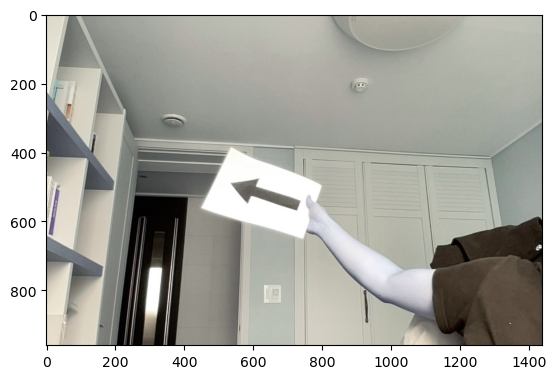

In [31]:
plt.imshow(img_copy)

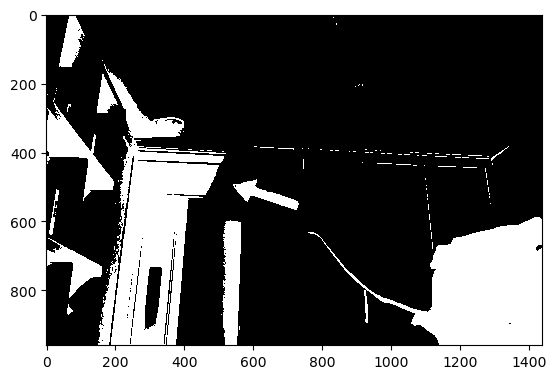

In [32]:
gray=cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)
_,thres=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thres,cmap=cmap_bin)

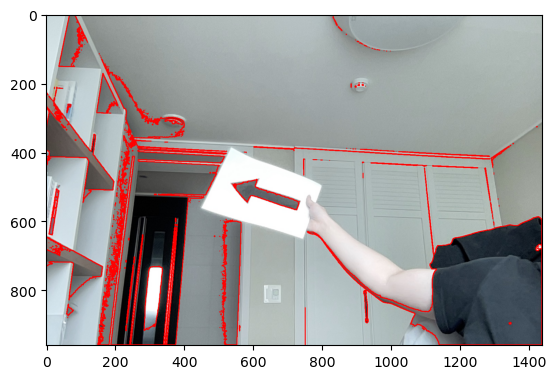

In [33]:
contours,hierarchy=cv2.findContours(thres,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_copy,contours,-1,(0,0,255),2)

plt_imshow_bgr(img_copy)

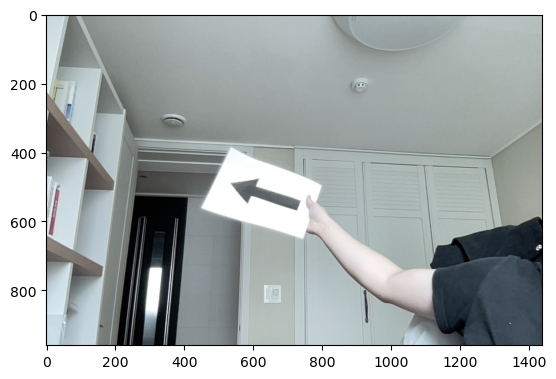

In [34]:
img=img1.copy()
plt_imshow_bgr(img)

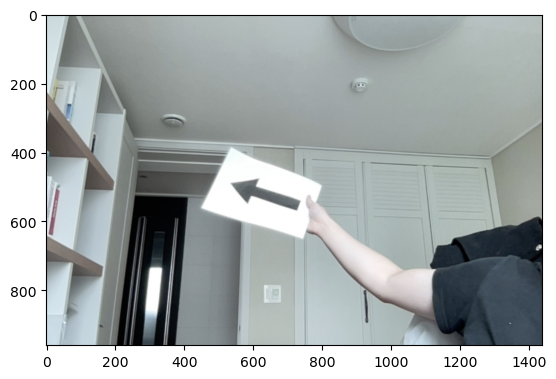

In [35]:
img_gauss_blur=cv2.GaussianBlur(img,(5,5),0)
plt_imshow_bgr(img_gauss_blur)

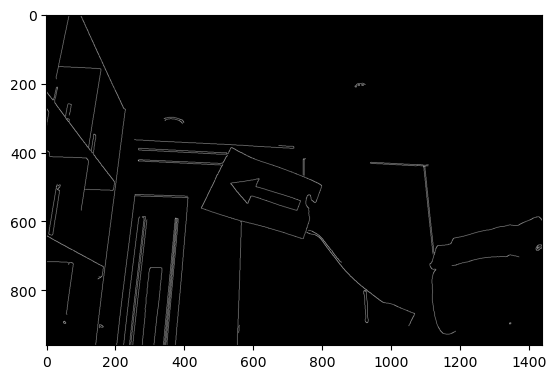

In [36]:
img_edges=cv2.Canny(img_gauss_blur,100,255)
plt.imshow(img_edges,cmap='gray')

In [37]:
hough_lines=cv2.HoughLinesP(img_edges,1,np.pi/180,5)
hough_lines

array([[[184, 629, 184, 629]],

       [[275, 672, 275, 672]],

       [[402, 652, 402, 645]],

       ...,

       [[194, 206, 194, 206]],

       [[ 59, 870,  59, 869]],

       [[256, 832, 256, 832]]], dtype=int32)

In [38]:
if hough_lines is not None:
    for i in range(0, len(hough_lines)):
        l = hough_lines[i][0]
        cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

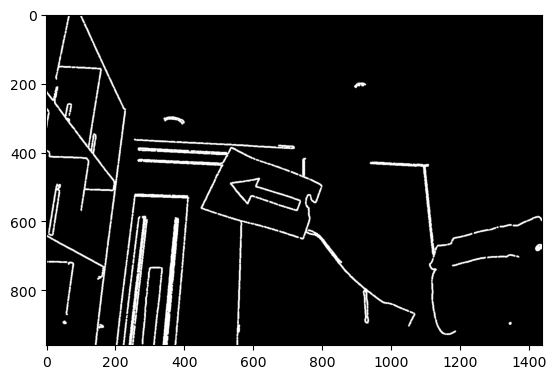

In [39]:
hough_lines_img=np.zeros_like(img)
if hough_lines is not None:
    for i in range(0, len(hough_lines)):
        l = hough_lines[i][0]
        cv2.line(hough_lines_img, (l[0], l[1]), (l[2], l[3]), (255,255,255), 3, cv2.LINE_AA)
        
hough_lines_img=cv2.cvtColor(hough_lines_img,cv2.COLOR_BGR2GRAY)
plt.imshow(hough_lines_img,'gray')

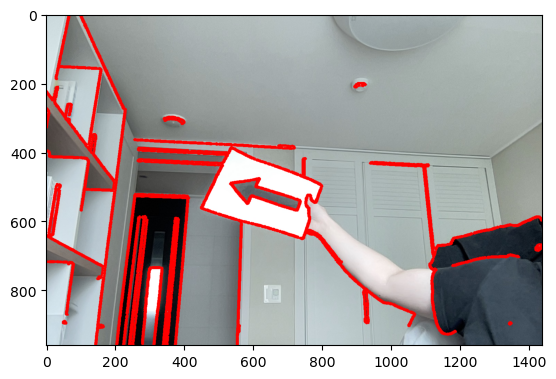

In [40]:
copy_hough_lines_img=img.copy()
contours_hough,hierarchy_hough=cv2.findContours(hough_lines_img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(copy_hough_lines_img,contours_hough,-1,(0,0,255),2)
plt_imshow_bgr(copy_hough_lines_img)

In [41]:
arrow=cv2.imread('/Users/hyeokbeom/Desktop/graduation_work/image_detecting/trials/template_arrow.png')
arrow_img=arrow.copy()
arrow_gray=cv2.cvtColor(arrow_img,cv2.COLOR_BGR2GRAY)
_,arrow_bin=cv2.threshold(arrow_gray,127,255,cv2.THRESH_BINARY_INV)
arrow_contours,_=cv2.findContours(arrow_bin,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [42]:
hulls=[]
for arrow_contour in arrow_contours:
    hull=cv2.convexHull(arrow_contour)
    if cv2.isContourConvex(hull):
        hulls.append(hull)
    
len(hulls)

1

In [43]:
eps=cv2.arcLength(arrow_contours[0],True)
arrow_contour=cv2.approxPolyDP(arrow_contours[0],eps*0.01,True)
hull=cv2.convexHull(arrow_contour)
hullp=cv2.convexHull(arrow_contour,returnPoints=False)
defects=cv2.convexityDefects(arrow_contour,hullp)
defects

array([[[    1,     3,     2, 57531]],

       [[    4,     6,     5, 57531]]], dtype=int32)

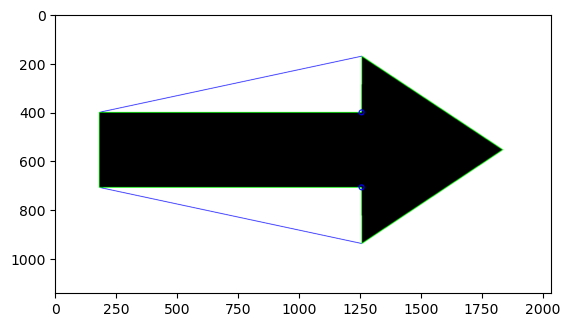

In [44]:
copy_arrow_img_hull=arrow.copy()
blank_arrow_img=np.zeros_like(copy_arrow_img_hull)
start_end=[]
cv2.drawContours(copy_arrow_img_hull,[hull],0,(0,0,255),2)
cv2.drawContours(copy_arrow_img_hull,[arrow_contour],0,(0,255,0),2)
for i in range(len(defects)):
    s,e,f,d = defects[i,0]
    start = tuple(arrow_contour[s][0])
    end = tuple(arrow_contour[e][0])
    far = tuple(arrow_contour[f][0])
    cv2.circle(copy_arrow_img_hull,far,10,(0,0,255),3)
    cv2.circle(blank_arrow_img,start,20,(255,0,0),3)
    cv2.circle(blank_arrow_img,end,20,(0,0,255),3)
    start_end.append([start,end])
    cv2.putText(blank_arrow_img,'start',start,cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),3)
    cv2.putText(blank_arrow_img,'end',end,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),3)
plt.imshow(copy_arrow_img_hull)

In [45]:
start_end=np.array(start_end)
dist=[]
for x in start_end:
    d=np.sqrt(np.sum(np.square(x[0]-x[1])))
    dist.append(d)

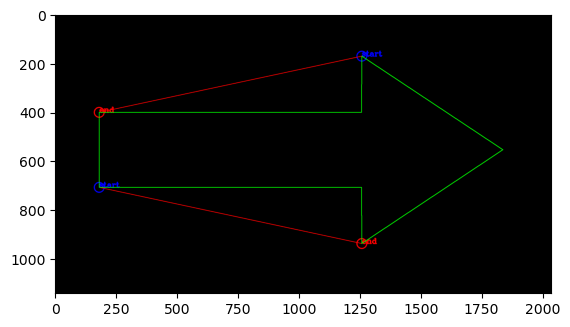

In [46]:
cv2.drawContours(blank_arrow_img,[hull],0,(0,0,255),2)
cv2.drawContours(blank_arrow_img,[arrow_contour],0,(0,255,0),2)
plt_imshow_bgr(blank_arrow_img)

In [47]:
start_end

array([[[1259,  172],
        [ 181,  402]],

       [[ 181,  709],
        [1259,  939]]], dtype=int32)

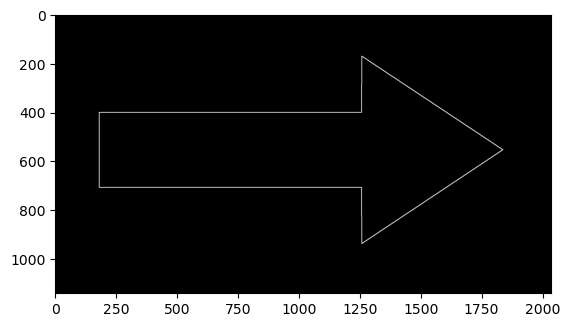

In [48]:
b=np.zeros_like(blank_arrow_img,dtype=np.uint8)
a=b.copy()
cv2.drawContours(a,[arrow_contour],0,(255,255,255),2)
plt_imshow_bgr(a)

In [49]:
np.nonzero(arrow_contour==0 |2)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

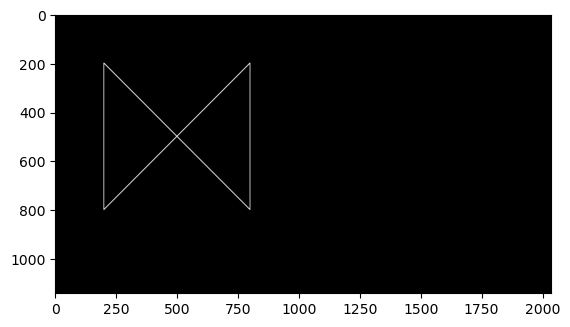

In [50]:
canv=b.copy()
self_intersect=np.array([[[200,200]],[[200,800]],[[800,200]],[[800,800]]])
cv2.drawContours(canv,[self_intersect],0,(255,255,255),2)
plt_imshow_bgr(canv)

In [51]:
import shapely

A=shapely.Polygon(self_intersect[:,0,:])

In [52]:
A.is_simple

False

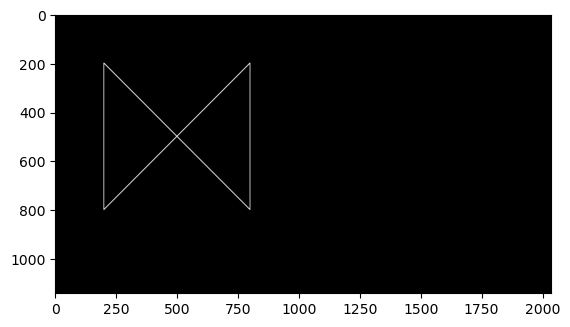

In [53]:
hull=cv2.convexHull(self_intersect)
cv2.drawContours(canv,hull,0,(255,255,255),2)
plt_imshow_bgr(canv)

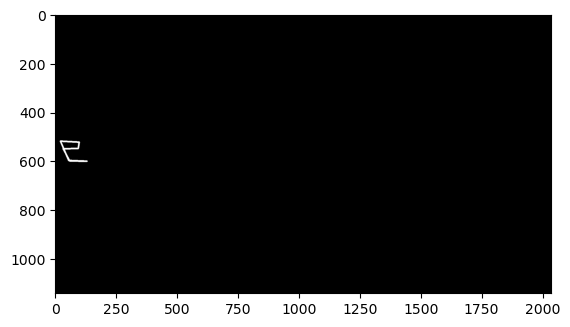

In [54]:
canv=b.copy()
approx=np.array([[[ 22, 520]],       [[ 56, 599]],       [[131, 602]],       [[ 60, 601]],       [[ 33, 551]],       [[ 95, 550]],       [[ 99, 524]]])
cv2.drawContours(canv,[approx],0,(255,255,255),5)
plt_imshow_bgr(canv)

In [55]:
import pickle
f=open('/Users/hyeokbeom/Desktop/graduation_work/a.pkl','rb')
contours=pickle.load(f)
f.close()

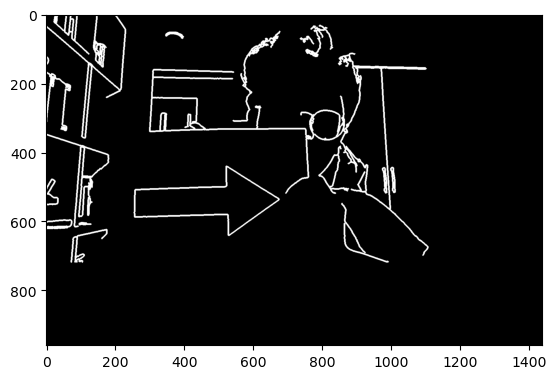

In [56]:
canv=np.zeros_like(img1)
plt_imshow_bgr(cv2.drawContours(canv,contours,-1,(255,255,255),3))
i=0

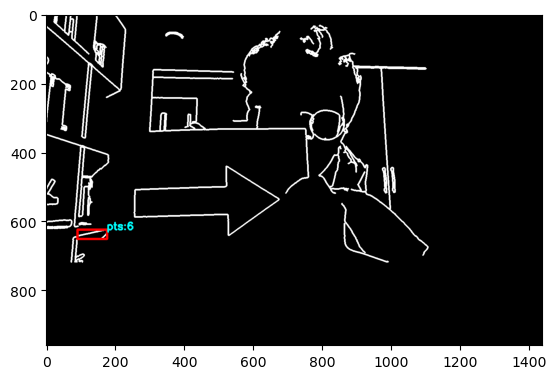

In [57]:
i+=1
eps=cv2.arcLength(contours[i],closed=True)
approx=cv2.approxPolyDP(contours[i],eps*0.02,True)
x,y,w,h=cv2.boundingRect(approx)
cv2.rectangle(canv,[x,y],[x+w,y+h],(0,0,255),5)
cv2.putText(canv,f'pts:{len(approx)}',approx[0][0],cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,0),3)
plt_imshow_bgr(canv)

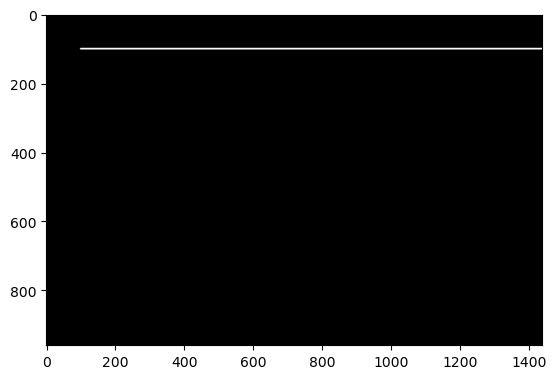

In [58]:
new_canv=np.zeros_like(img1)
h,w,c=new_canv.shape
cnt=np.array([[[w,100]],[[100,100]]])
plt_imshow_bgr(cv2.drawContours(new_canv,[cnt],0,(255,255,255),3))

In [67]:
cases=np.array([[[1,3],[4,6]],[[0,2], [4,6]],[[5,0], [1,3]]])

In [73]:
for case in cases:
    print(((case[:,0]-case[:,1])%7).all())
    

True
True
True
